# Funciones de Base Atómicas

Darío Mitnik

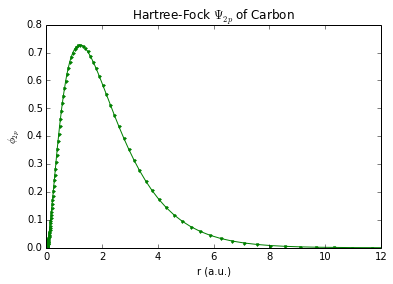

In [23]:
# Read and Plot Hartree-Fock 2p function


import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt
%matplotlib inline

from __future__ import division 

fig = plt.figure()

x, psi2pHF  = np.loadtxt('wave.2p', unpack=True)
xsize = len(x)

plt.plot(x, psi2pHF,  c='g', marker='.')

plt.title("Hartree-Fock $\Psi_{2p}$ of Carbon");
plt.ylabel('$\phi_{2p}$')
plt.xlabel('r (a.u.)')
plt.xlim(0,12)
plt.show()


## Expansión en Funciones Hidrogénicas

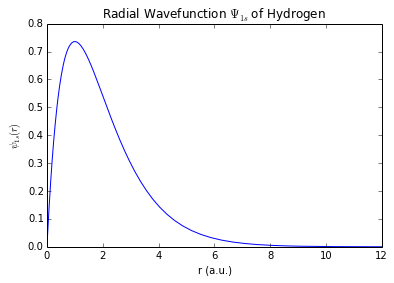

In [24]:
# Función Radial Hidrogénica (con hipergeométricas)

import numpy as np
import sympy as sp

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)


def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R

psiH = np.zeros(xsize)

# Copiamos el array simbólico a numérico

for i in range(xsize):
  psiH[i]=R_hyp(1,0,1,x[i])

# Ploteo

plt.plot(x,x*psiH);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.xlim(0,12);


In [25]:
# Integral simbolica

from sympy import integrate

Integral = integrate( (r * R_hyp(1,0,1,r))**2, (r,0,float('inf'))).evalf()
print(Integral)

1.00000000000000


In [26]:
# Integral numerica

np.trapz((x*psiH)**2,x)


1.0006511310567434

In [27]:
np.trapz(psi2pHF**2,x)

1.0006511688331279

In [28]:
def C(n,l,x):
    
    psibase = np.zeros(xsize)
    for i in range(xsize):
        psibase[i]=R_hyp(n,l,6,x[i])*x[i]

    coeff = np.trapz(psibase*psi2pHF,x)
    return coeff

In [29]:
cnl = np.zeros((5,4))

for n in range(1,5):
    for l in range(0,n):
        cnl[n,l]=C(n,l,x)
        

In [30]:
# prueba con 3 funciones (1s,2s y 2p)

print cnl[1,0]
print cnl[2,0]
print cnl[3,0]

0.217427238577
-0.800078727081
0.551724144138


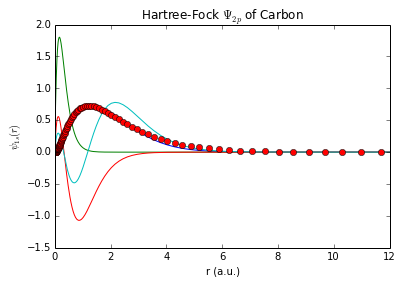

In [31]:
yH1s = np.zeros(xsize)
yH2s = np.zeros(xsize)
yH3s = np.zeros(xsize)
yap = np.zeros(xsize)

for i in range(xsize):
    yH1s[i] = R_hyp(1,0,6,x[i])*x[i]
    yH2s[i] = R_hyp(2,0,6,x[i])*x[i]
    yH3s[i] = R_hyp(3,0,6,x[i])*x[i]
    
yap = 0.217427238577*yH1s - 0.800078727081*yH2s + 0.551724144138*yH3s

# Ploteo

plt.plot(x,yap);
plt.plot(x,yH1s);
plt.plot(x,yH2s);
plt.plot(x,yH3s);
plt.plot(x,psi2pHF,'ro');
plt.title("Hartree-Fock $\Psi_{2p}$ of Carbon");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.xlim(0,12);


In [32]:
# Wavefunction Reconstruction (general)

yappb = np.zeros(xsize)

for i in range(xsize):    
    yappb[i] = cnl[2,1]*R_hyp(2,1,6,x[i]) + cnl[3,1]*R_hyp(3,1,6,x[i]) +  \
               cnl[4,1]*R_hyp(4,1,6,x[i]) 


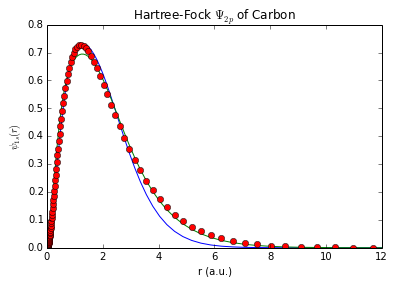

In [33]:

# Ploteo

plt.plot(x,yap);
plt.plot(x,yappb*x);
plt.plot(x,psi2pHF,'ro');
plt.title("Hartree-Fock $\Psi_{2p}$ of Carbon");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.xlim(0,12);


In [34]:
cnl

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.21742724,  0.        ,  0.        ,  0.        ],
       [-0.80007873,  0.7651894 ,  0.        ,  0.        ],
       [ 0.55172414, -0.6356785 ,  0.97530561,  0.        ],
       [-0.09529544,  0.09928967, -0.07002915,  0.7619142 ]])

In [35]:
cnl**2

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.0472746 ,  0.        ,  0.        ,  0.        ],
       [ 0.64012597,  0.58551482,  0.        ,  0.        ],
       [ 0.30439953,  0.40408715,  0.95122103,  0.        ],
       [ 0.00908122,  0.00985844,  0.00490408,  0.58051324]])

## Expansión en Slaters  (sin nodos)

In [36]:
def Snz(n,eta,r):
    rnum = (2*eta)**(2*n + 1)
    rden = sp.factorial(2*n) 
    rnorm = sp.sqrt(rnum/rden)
    rfunc = r**(n-1) * sp.exp(-eta*r)  
    R = rnorm * rfunc
    return R


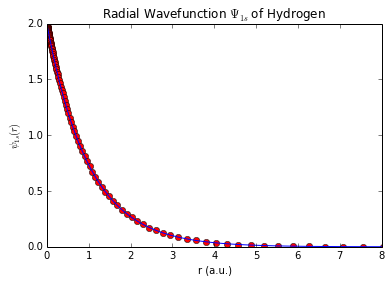

In [37]:
psiS = np.zeros(xsize)

# Copiamos el array simbólico a numérico

for i in range(xsize):
  psiS[i]=Snz(1,1,x[i])

# Ploteo

plt.plot(x,psiH,'ro');
plt.plot(x,psiS);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");
plt.xlim(0,8);


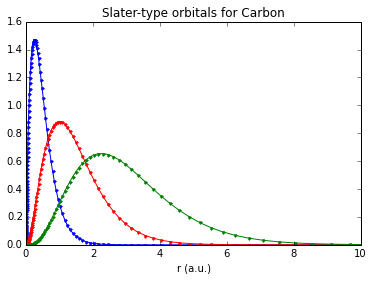

In [51]:
# Carbon Hidrogen-like

yC1s = np.zeros(xsize)
yC2p = np.zeros(xsize)
yC3d = np.zeros(xsize)
STO1 = np.zeros(xsize)
STO2 = np.zeros(xsize)
STO3 = np.zeros(xsize)

z=4
for i in range(xsize):
    yC1s[i] = R_hyp(1,0,z,x[i])
    yC2p[i] = R_hyp(2,1,z,x[i])
    yC3d[i] = R_hyp(3,2,z,x[i])
    STO1[i]=Snz(1,z,x[i])
    STO2[i]=Snz(2,z/2,x[i])
    STO3[i]=Snz(3,z/3,x[i])
 
plt.plot(x,yC1s*x,'b');
plt.plot(x,yC2p*x,'r');
plt.plot(x,yC3d*x,'g');
plt.plot(x,STO1*x,'b.',linewidth='2.5');
plt.plot(x,STO2*x,'r.',linewidth='2.5');
plt.plot(x,STO3*x,'g.',linewidth='2.5');
plt.title("Slater-type orbitals for Carbon");
plt.xlabel("r (a.u.)");
plt.xlim(0,10);


In [19]:
# Expansión Hidrógenica en Slaters

In [55]:
def CS(nH,lH,zH,n,z,x):
    
    nsx = len(x)
    
    rint = np.zeros(xsize)
    for i in range(xsize):
        rint[i]=Snz(n,z,x[i])*R_hyp(nH,lH,zH,x[i])  
        
    coeff = np.trapz(rint*x*x,x)
    return coeff

In [56]:
# Expansión 1s

print CS(1,0,1,1,1,x)


1.00065113106


In [58]:
# Expansión 2s

nH=2
lH=0
zH=1
zS = zH/nH
print CS(nH,lH,zH,1,zS,x)
print CS(nH,lH,zH,2,zS,x)


-0.500325588202
-0.866589324228


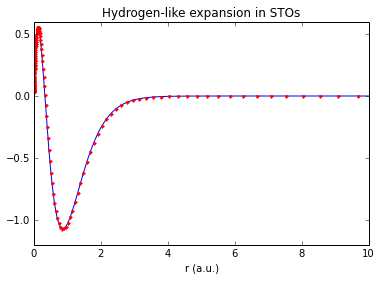

In [72]:
# Wavefunction Reconstruction  

yappb = np.zeros(xsize)
yH = np.zeros(xsize)

nH=2
lH=0
zH=6
zS = zH/nH

for i in range(xsize):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yappb[i] = 1*Snz(1,zS,x[i]) - np.sqrt(3)*Snz(2,zS,x[i])
    
plt.plot(x,yH*x,'b');
plt.plot(x,yappb*x,'r.',linewidth='2.5');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.xlim(0,10);


In [79]:
# Expansión 3s

nH=3
lH=0
zH=1
zS = zH/nH
print CS(nH,lH,zH,1,zS,x)
print CS(nH,lH,zH,2,zS,x)
print CS(nH,lH,zH,3,zS,x)
print CS(nH,lH,zH,4,zS,x)
print CS(nH,lH,zH,5,zS,x)


-2.93922429396e-05
0.288685438886
0.632185464971
0.843780997751
0.887150860009


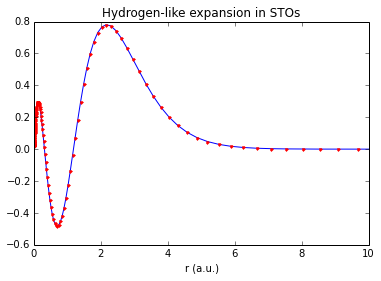

In [77]:
# Wavefunction Reconstruction  

yappb = np.zeros(xsize)
yH = np.zeros(xsize)

nH=3
lH=0
zH=6
zS = zH/nH

for i in range(xsize):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yappb[i] = 1*Snz(1,zS,x[i]) - np.sqrt(12)*Snz(2,zS,x[i]) + np.sqrt(10)*Snz(3,zS,x[i])
    
plt.plot(x,yH*x,'b');
plt.plot(x,yappb*x,'r.',linewidth='2.5');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.xlim(0,10);


In [114]:
# General Expansion


def acfS(n,l,N):
    sgn = (-1)**(N-l-1)
    rnum = sp.factorial(n-l-1) * sp.factorial(n+l) * sp.factorial(2*N)
    rden = 2*n
    rf1 = sp.sqrt(rnum/rden)
    rf2 = sp.factorial(N-l-1) * sp.factorial(n-N) * sp.factorial(N+l)
    an = sgn*rf1/rf2
    return an

[  0.   1.  12.  10.   0.]


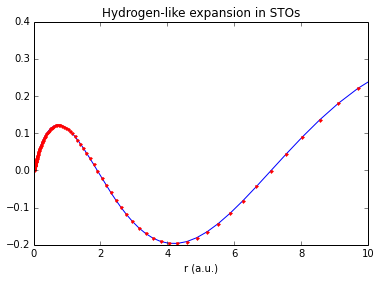

In [116]:
# Wavefunction Reconstruction  

yappb = np.zeros(xsize)
yH = np.zeros(xsize)
acS = np.zeros(5)

nH=3
lH=0
zH=1
zS = zH/nH

for N in range(lH+1,nH+1):   
    acS[N]=acfS(nH,lH,N)

print acS**2

for i in range(xsize):    
    yH[i] = R_hyp(nH,lH,zH,x[i])
    yS = 0.0
    for N in range(lH+1,nH+1):
        yS = yS + acS[N]*Snz(N,zS,x[i]) 
       
    yappb[i] = yS
     
plt.plot(x,yH*x,'b');
plt.plot(x,yappb*x,'r.',linewidth='2.5');
plt.title("Hydrogen-like expansion in STOs ");
plt.xlabel("r (a.u.)");
plt.xlim(0,10);
